## Интерполяционный метод Ньютона
### Работу выполнил: Татур Стефан

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Заданные в условии точки

x = np.array([0.5,2.5,6.5,4.5,1.5])
for i in range(len(x)):
    x[i] = x[i]*np.pi/7

print(np.array2string(x, formatter={'float_kind': lambda x: f'{x:.3f}'}))

[0.224 1.122 2.917 2.020 0.673]


In [24]:
def f(x): # just a values of the function
    return(np.sqrt(x) * np.sin(x) + 1)

In [28]:
y = f(x)
print(np.array2string(y, formatter={'float_kind': lambda x: f'{x:.3f}'}))

[1.105 1.954 1.380 2.280 1.512]


In [36]:
def divided_differences(x_values, y_values, k):
    result = 0
    for j in range(k + 1):
        mul = 1
        for i in range(k + 1):
            if i != j:
                mul *= x_values[j] - x_values[i]
        result += y_values[j]/mul
    return result


def create_Newton_polynomial(x_values, y_values):
    div_diff = []
    for i in range(1, len(x_values)):
        div_diff.append(divided_differences(x_values, y_values, i))
    def newton_polynomial(x):
        result = y_values[0]
        for k in range(1, len(y_values)):
            mul = 1
            for j in range(k):
                mul *= (x-x_values[j])
            result += div_diff[k-1]*mul
        return result
    return newton_polynomial

new_pol = create_Newton_polynomial(x, y)

for i in x:
    print("x = {:.4f}\t y_predict = {:.4f}\t y = {:4f}".format(i, new_pol(i),y[x.tolist().index(i)]))

x = 0.2244	 y_predict = 1.1054	 y = 1.105410
x = 1.1220	 y_predict = 1.9543	 y = 1.954346
x = 2.9172	 y_predict = 1.3801	 y = 1.380061
x = 2.0196	 y_predict = 2.2804	 y = 2.280389
x = 0.6732	 y_predict = 1.5116	 y = 1.511565


## Визуализация

In [43]:
def L1():
    return divided_differences(x,y,0)
def L2(j):
    return divided_differences(x,y,0) + divided_differences(x,y,1)*(j-x[0])

def L3(j):
    return divided_differences(x,y,0) + divided_differences(x,y,1)*(j-x[0]) + divided_differences(x,y,2)*(j-x[0])*(j-x[1])
def L4(j):
    return divided_differences(x,y,0) + divided_differences(x,y,1)*(j-x[0]) + divided_differences(x,y,2)*(j-x[0])*(j-x[1]) + divided_differences(x,y,3)*(j-x[0])*(j-x[1])*(j-x[2]) 
def L5(j):
    return divided_differences(x,y,0) + divided_differences(x,y,1)*(j-x[0]) + divided_differences(x,y,2)*(j-x[0])*(j-x[1]) + divided_differences(x,y,3)*(j-x[0])*(j-x[1])*(j-x[2]) + divided_differences(x,y,4)*(j-x[0])*(j-x[1])*(j-x[2])*(j-x[3])


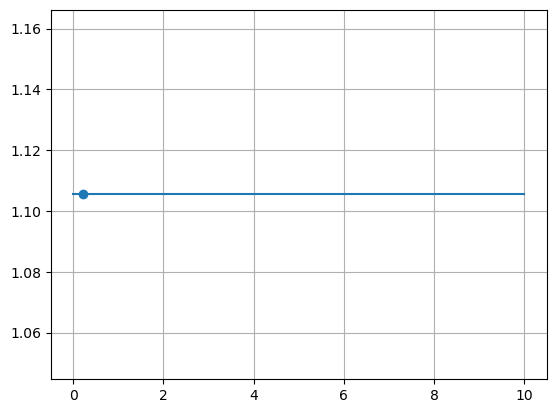

In [47]:
xx = np.linspace(0,10,100)
yy1 = np.ones(100)*1.105410
x1 = 0.224

plt.grid(True)
plt.plot(xx,yy1)
plt.scatter(x1,yy1[0])

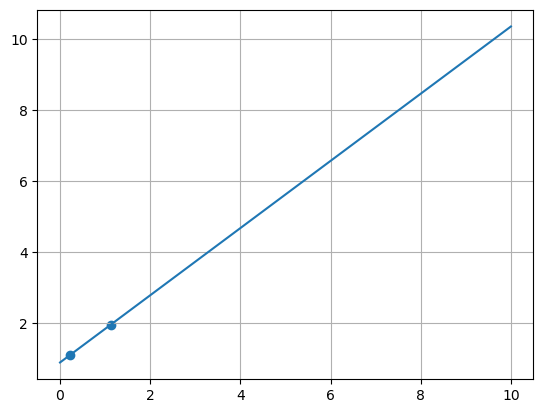

In [49]:
xx = np.linspace(0,10,100)
yy2 = L2(xx)

x2 = [x[0],x[1]]
y2 = [y[0],y[1]]

plt.grid(True)
plt.plot(xx,yy2)
plt.scatter(x2,y2)

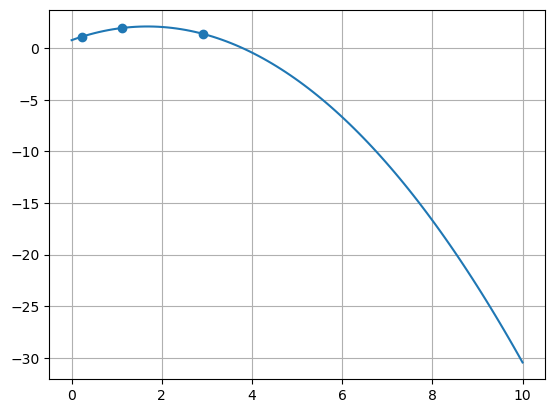

In [51]:
xx = np.linspace(0,10,100)
yy3 = L3(xx)

x3 = [x[0],x[1],x[2]]
y3 = [y[0],y[1],y[2]]

plt.grid(True)
plt.plot(xx,yy3)
plt.scatter(x3,y3)

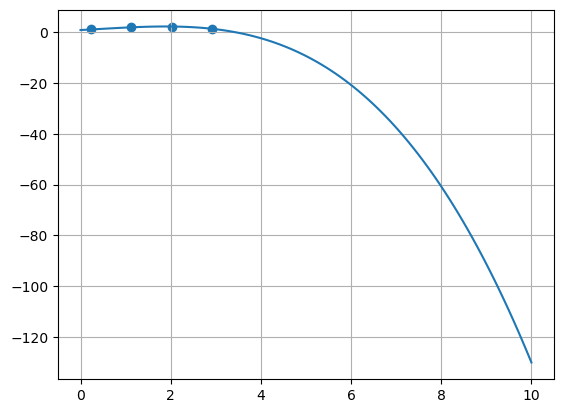

In [53]:
xx = np.linspace(0,10,100)
yy4 = L4(xx)

x4 = [x[0],x[1],x[2],x[3]]
y4 = [y[0],y[1],y[2],x[3]]

plt.grid(True)
plt.plot(xx,yy4)
plt.scatter(x4,y4)

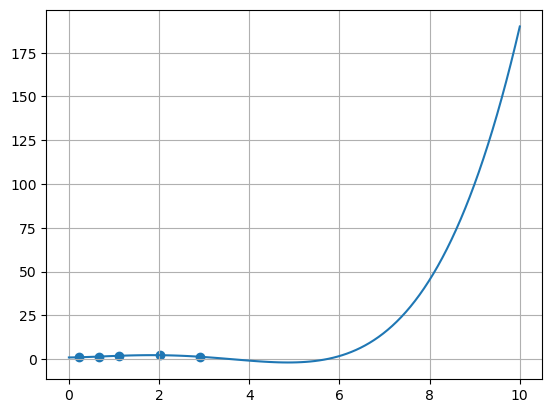

In [55]:
xx = np.linspace(0,10,100)
yy5 = L5(xx)

x5 = [x[0],x[1],x[2],x[3],x[4]]
y5 = [y[0],y[1],y[2],y[3],y[4]]

plt.grid(True)
plt.plot(xx,yy5)
plt.scatter(x5,y5)

In [57]:
axes = [yy1,yy2,yy3,yy4,yy5]

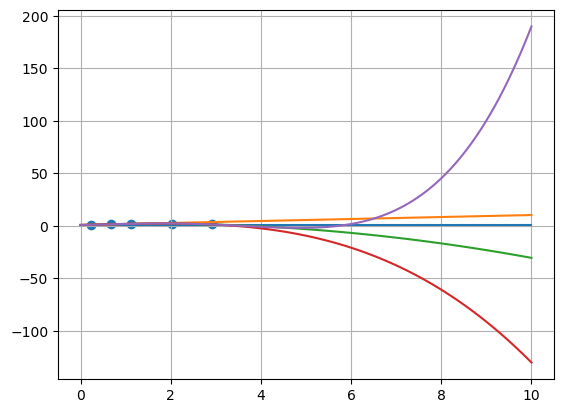

In [59]:
xx = np.linspace(0,10,100)

plt.grid(True)
plt.scatter(x5,y5)
for i in axes:
    plt.plot(xx,i)

plt.show()

## Еще одна реализация метода Ньютона

In [62]:
import functools

In [64]:
def f(x): # just a values of the function
    return(np.sqrt(x) * np.sin(x) + 1)

def devided_difference(*x): # return the value of the function f(x1,x2,...,xk)
    result = []
    for i in range(len(x)): #i is a x from x.array
        derivative = []
        chislitel = f(x[i])
        
        for j in range(len(x)):
            if i != j:
                derivative.append(x[i]-x[j])
        s = chislitel/functools.reduce(lambda a, b: a * b, derivative)
        summer.append(s)
    return sum(summer)

def create_Newton_polynomial(x_values, y_values):
    div_diff = []
    for i in range(1, len(x_values)):
        div_diff.append(divided_differences(x_values, y_values, i))
    def newton_polynomial(x):
        result = y_values[0]
        for k in range(1, len(y_values)):
            mul = 1
            for j in range(k):
                mul *= (x-x_values[j])
            result += div_diff[k-1]*mul
        return result
    return newton_polynomial


x_values = [0, 2, 3, 5]
y_values = [0, 1, 3, 2]

new_pol = create_Newton_polynomial(x_values, y_values)

for x in x_values:
    print("x = {:.4f}\t y = {:.4f}".format(x, new_pol(x)))

x = 0.0000	 y = 0.0000
x = 2.0000	 y = 1.0000
x = 3.0000	 y = 3.0000
x = 5.0000	 y = 2.0000
